# Camera Calibration
## Computer Vision and Image Processing - Lab Session 4 Excerices Solutions
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Alex Costanzino, alex.costanzino@unibo.it - Iacopo Curti, iacopo.curti2@unibo.it

## Exercise 0: Calibrate your own camera (or Sample Camera)

Try to reimplement the code explained in the theory. Acquire a set of images with a camera (e.g. your mobile phone camera) and calibrate it. For the calibration target print the chessboard.pdf in a A4 paper.
If you are not able to use a camera use the sample images contained in "calibration_images/*.jpg"

processing my_chessboards/0.jpeg


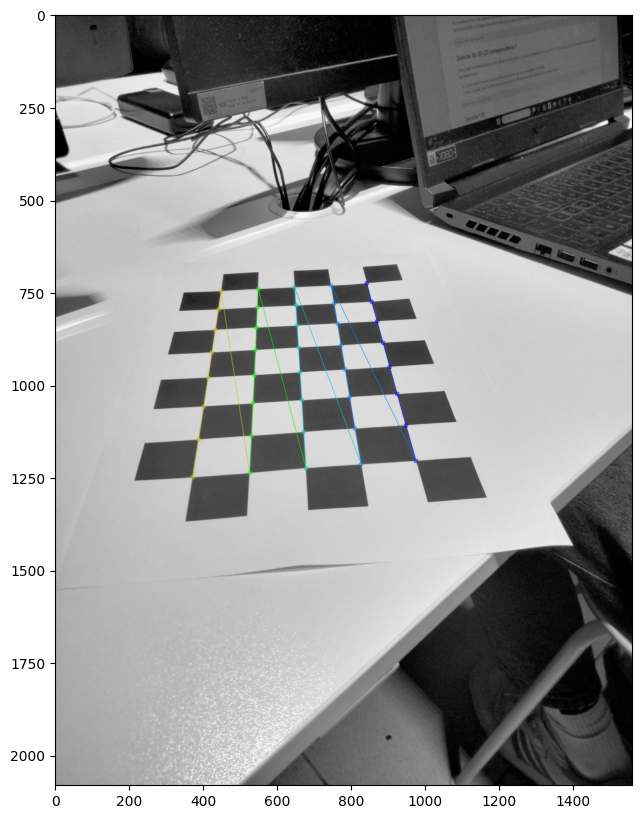

           my_chessboards/0.jpeg... OK
processing my_chessboards/1.jpeg


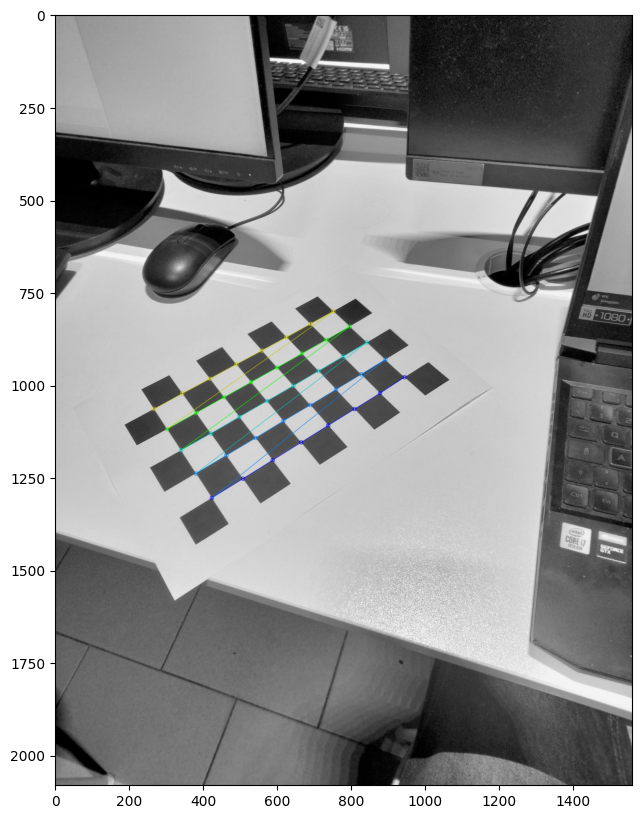

           my_chessboards/1.jpeg... OK
processing my_chessboards/2.jpeg


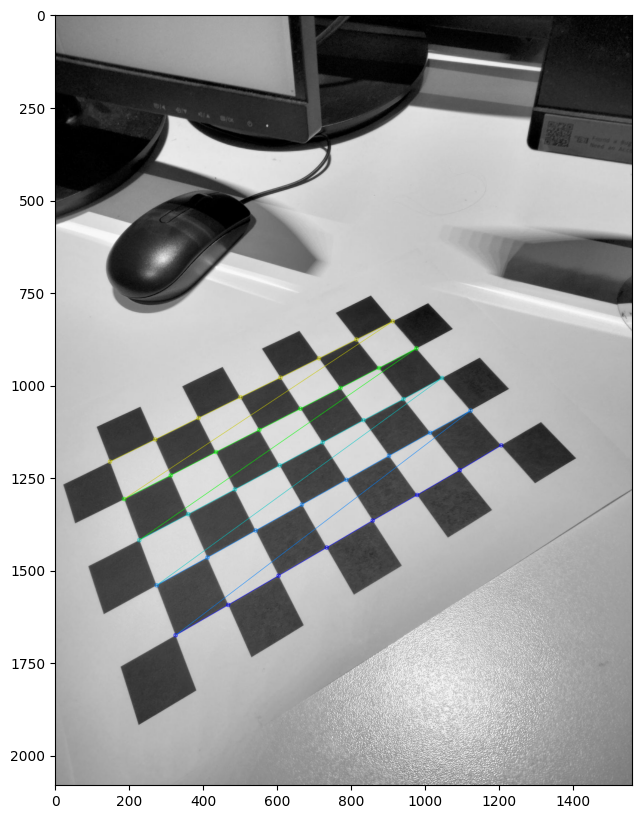

           my_chessboards/2.jpeg... OK
processing my_chessboards/3.jpeg


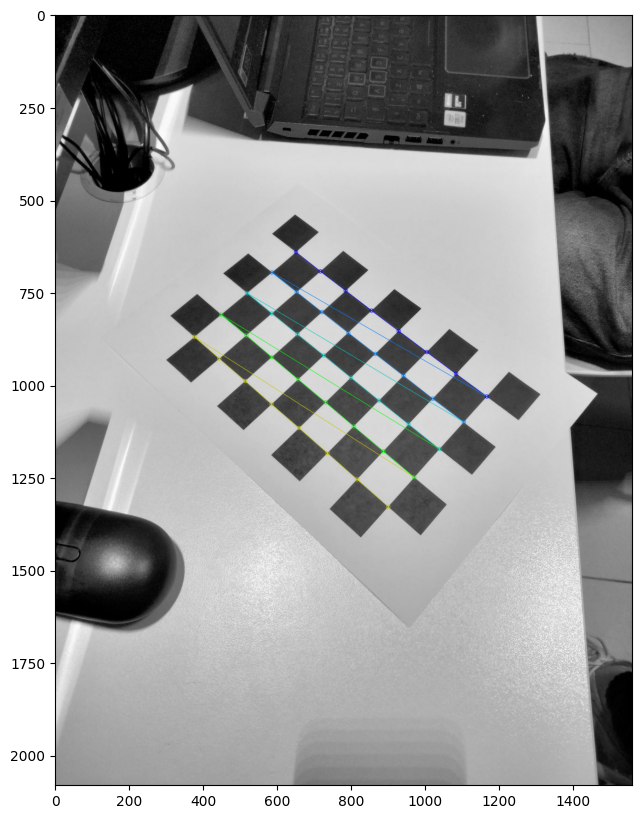

           my_chessboards/3.jpeg... OK
processing my_chessboards/4.jpeg


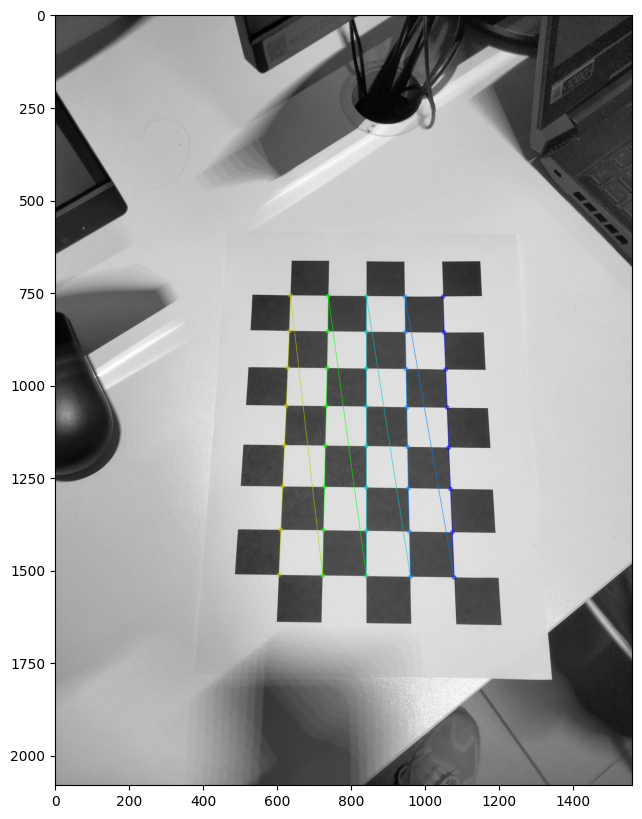

           my_chessboards/4.jpeg... OK
processing my_chessboards/5.jpeg


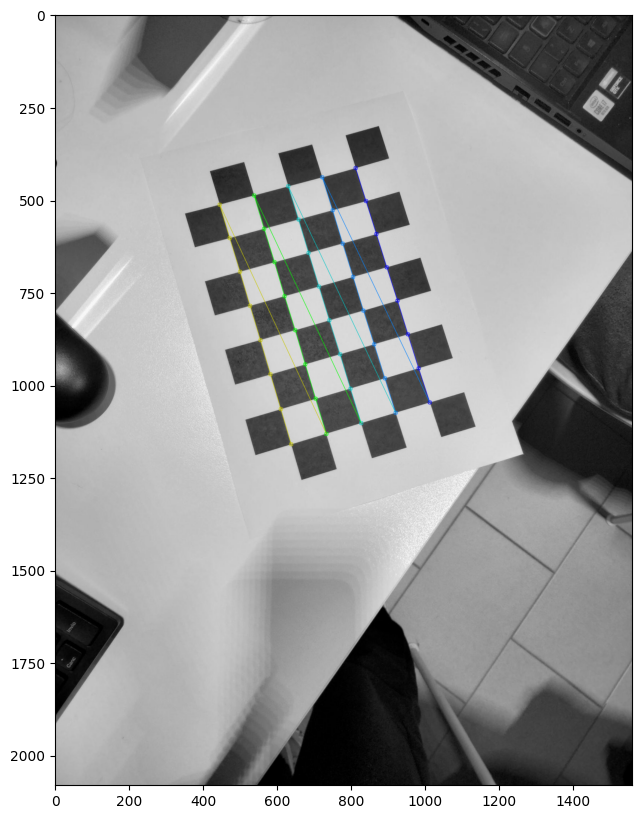

           my_chessboards/5.jpeg... OK
processing my_chessboards/6.jpeg


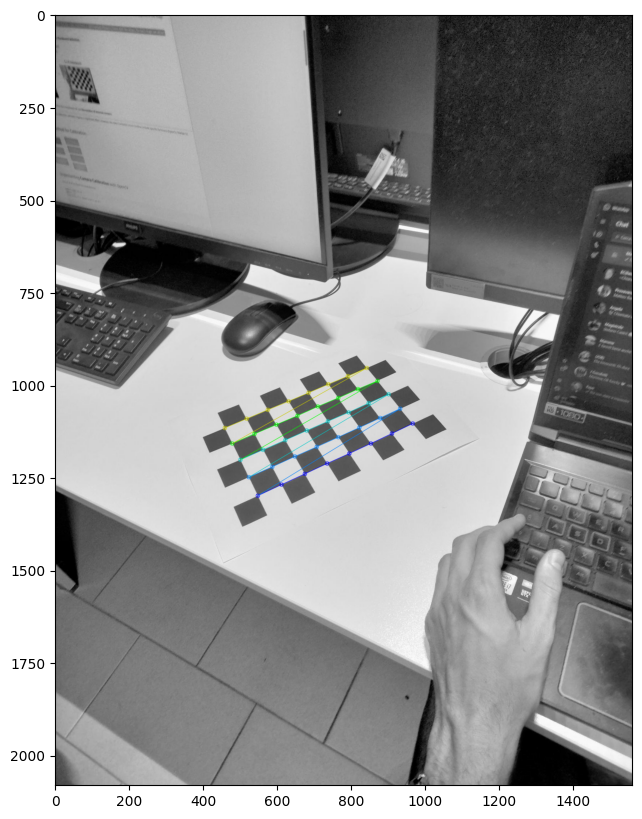

           my_chessboards/6.jpeg... OK
processing my_chessboards/7.jpeg


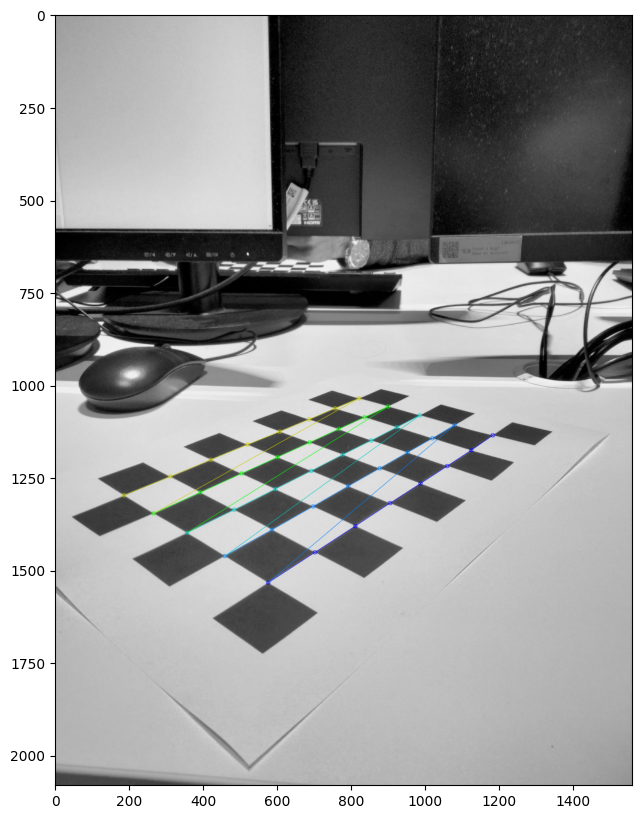

           my_chessboards/7.jpeg... OK
processing my_chessboards/8.jpeg


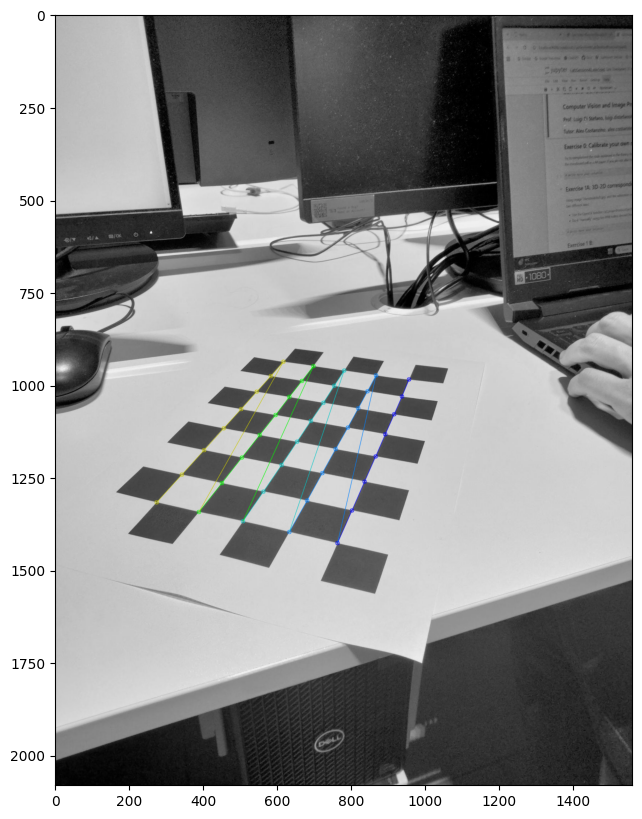

           my_chessboards/8.jpeg... OK
processing my_chessboards/9.jpeg


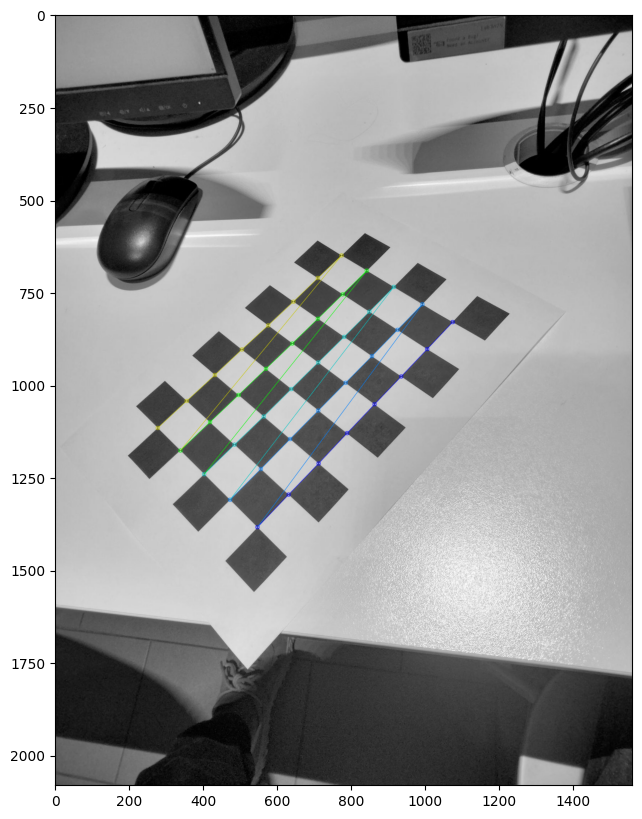

           my_chessboards/9.jpeg... OK
processing my_chessboards/10.jpeg


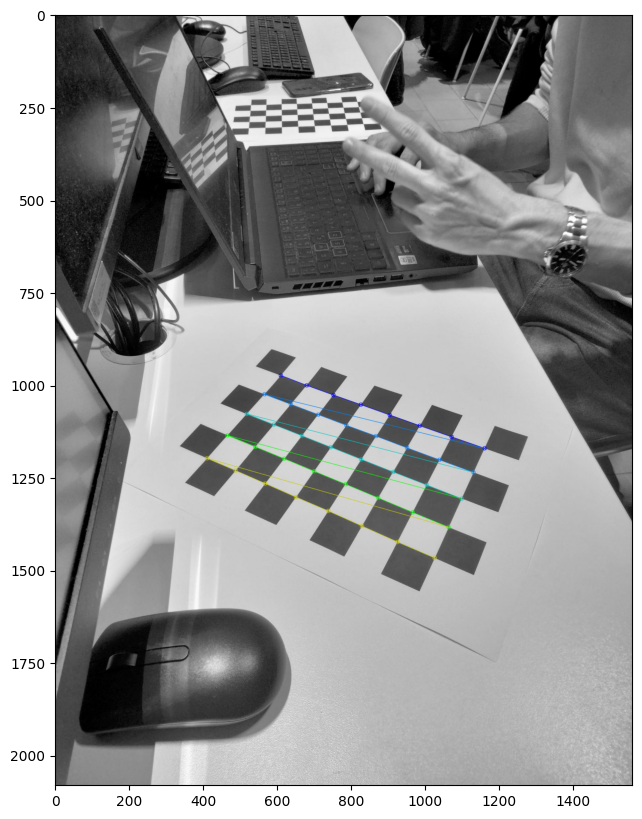

           my_chessboards/10.jpeg... OK
processing my_chessboards/11.jpeg


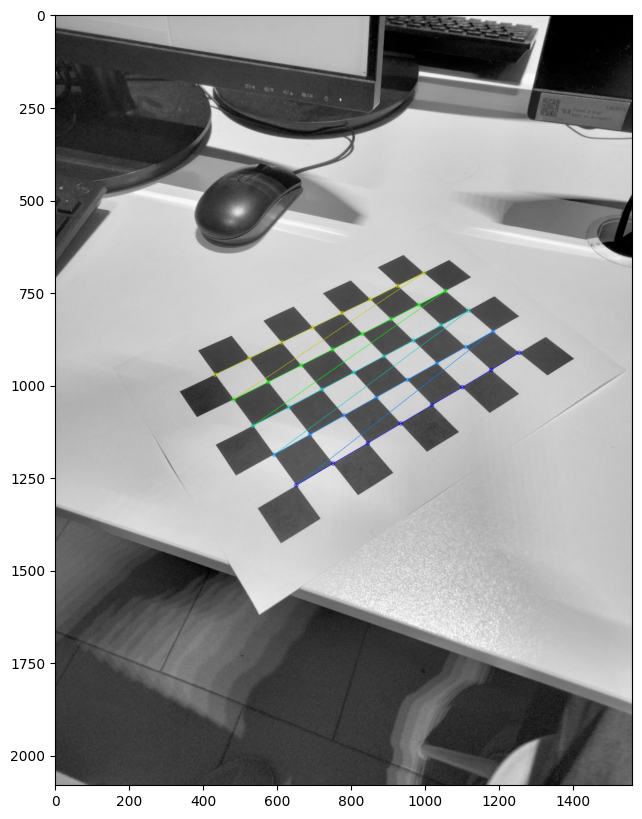

           my_chessboards/11.jpeg... OK
processing my_chessboards/12.jpeg


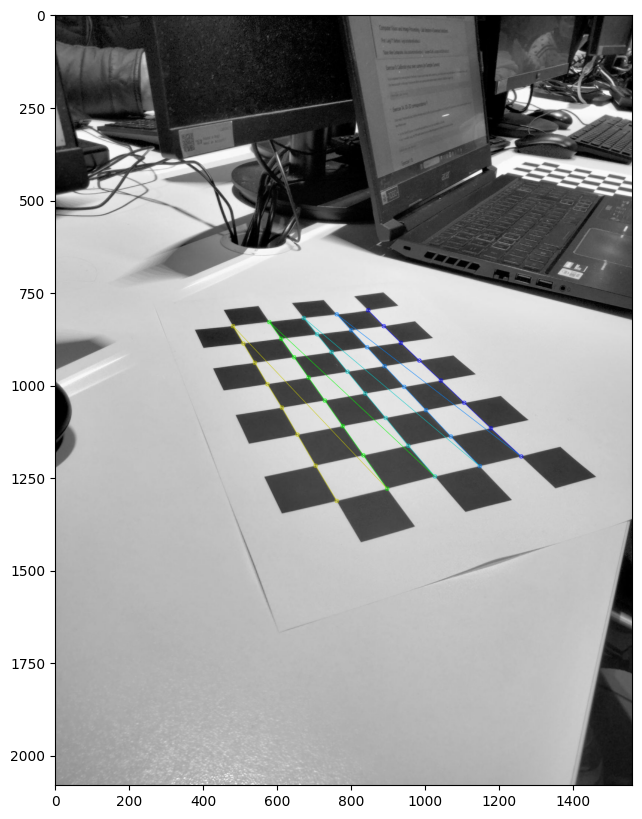

           my_chessboards/12.jpeg... OK
13
13


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# otteniamo le corrispondenze
pattern_size = (8,5) # number of inner corner, (columns, rows) for OpenCV
square_size = 26.5 #mm
dirname = "my_chessboards/"
img_names = [dirname + str(i) + ".jpeg" for i in range(13)]

## coordinate 3d
indices = np.indices(pattern_size, dtype=np.float32)
indices *= square_size
coords_3D = np.transpose(indices, [2, 1, 0])
coords_3D = coords_3D.reshape(-1, 2)
pattern_points = np.concatenate([coords_3D, np.zeros([coords_3D.shape[0], 1], dtype=np.float32)], axis=-1)

## funzione che mi calcola le coordinate 2d
def processImage(fn):
    print('processing {}'.format(fn))
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    # Check image loaded correctly
    if img is None:
        print("Failed to load", fn)
        return None
    # Finding corners
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if found:
        # Refining corner position
        term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 5, 1)
        cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        # Visualize detected corners
        vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawChessboardCorners(vis, pattern_size, corners, found)
        plt.figure(figsize=(20,10))
        plt.imshow(vis)
        plt.show()
    else:
        print('chessboard not found')
        return None
    print('           %s... OK' % fn)
    # restituisco una tupla contenente gli array dei punti 2d e dei punti 3d
    return (corners.reshape(-1, 2), pattern_points) # -1 in reshape dice a numpy di calcolare da se il numero di righe considerando il numero di elementi colonne = 2 

chessboards = [processImage(fn) for fn in img_names]
print(len(chessboards))
chessboards = [x for x in chessboards if x is not None]
print(len(chessboards))

## creo due liste per le associazioni
obj_points = [] #3D points
img_points = [] #2D points
for (corners, pattern_points) in chessboards:
        img_points.append(corners)
        obj_points.append(pattern_points)

In [2]:
# Calibriamo la camera
# Getting the width and height of the images

for i in img_names:
    h, w = cv2.imread(i, cv2.IMREAD_GRAYSCALE).shape[:2]
    print(h, w)

# Calibrating Camera
rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())
print("Rotation vectors:", rvecs)
print("translation vectors", tvecs)

2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560
2080 1560

RMS: 0.4981008957759135
camera matrix:
 [[1.56849505e+03 0.00000000e+00 7.58884303e+02]
 [0.00000000e+00 1.57154270e+03 9.84799742e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 0.18866378 -0.91756886 -0.0115889  -0.00226364  1.62245849]
Rotation vectors: (array([[-0.74150944],
       [ 0.70276307],
       [ 1.36014414]]), array([[-0.17849308],
       [ 0.89305614],
       [ 2.3676211 ]]), array([[-0.09525992],
       [ 0.83979146],
       [ 2.48569552]]), array([[-0.45589797],
       [ 0.16925918],
       [ 0.73047495]]), array([[-0.23127046],
       [ 0.24547529],
       [ 1.57172075]]), array([[-0.14743261],
       [ 0.04848243],
       [ 1.2765044 ]]), array([[-0.12284   ],
       [ 1.05183926],
       [ 2.45925711]]), array([[-0.62048238],
       [ 1.40029746],
       [ 1.92026182]]), array([[-0.72991825],
       [ 0.

## Exercise 1A: 3D-2D correspondence

Using image "chessboards/0.jpg" and the calibration results, find the 2D point correspondent to the 3D point (53, 53, 0) and draw a red circle around it.
Solve the exercise in two different ways:

* Use the OpenCV function cv2.projectPoints(objectPoints, rvec, tvec, cameraMatrix, distCoeffs).
* Do it "manually" using the PPM matrix derived from the calibration parameters obtained in the previous exercise.

[653.24774 838.19434]


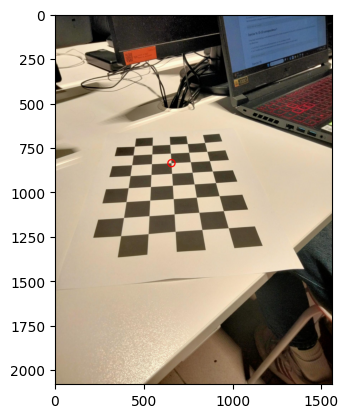

In [4]:
# with projectPoints()

image_index=0
point_3d = np.float32([53, 53, 0])
point_2d,_ = cv2.projectPoints(point_3d,rvecs[image_index],tvecs[image_index],camera_matrix,dist_coefs) 
point_2d = point_2d.reshape(-1)
print(point_2d)

img = cv2.imread(img_names[image_index])
cv2.circle(img, (int(point_2d[0]), int(point_2d[1])), 20 ,[0, 0, 255], 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

[653.79507573 839.12691625]


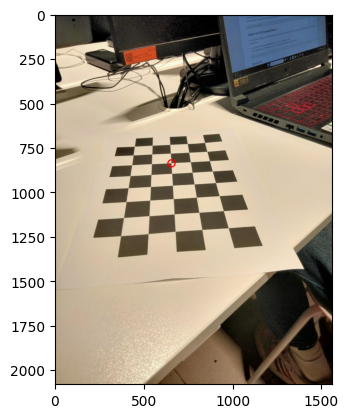

In [20]:
# with PPM
image_index=0
img = cv2.imread(img_names[image_index])

# per tenere conto della lense distortion lavoriamo direttamente con l'immagine non distorta
# e per trovare le coordinate 2d usiamo una nuova matrice degli intrinseci corretta
# (questo è diverso dalla teoria in cui, applichiamo in ordine: estrinseci, standard PPM, 
#  warping per lense distortion e intrinseci vecchi)
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))
# x, y, w_2, h_2 = roi
# img_undistorted = cv2.undistort(img, camera_matrix, dist_coefs, None, newcameramtx)
# img_undistorted = img_undistorted[y:y+h_2, x:x+w_2] # crop the ROI

rotation_matrix = cv2.Rodrigues(rvecs[image_index])[0]
translation_matrix = tvecs[image_index]
extrinsic_matrix = np.concatenate([rotation_matrix, translation_matrix], axis=1)
ppm = np.matmul(camera_matrix, extrinsic_matrix)

point_3d = np.float32([53, 53, 0, 1]) # sono in projective space e quindi ci aggiungo un uno
point_2d_projective = np.matmul(ppm, point_3d)
point_2d = point_2d_projective / point_2d_projective[2] # back to euclidean space
point_2d = point_2d[:2]
# notare che c'è una differenza rispetto a projectPoints() dovuta alla mancata gestione della distorsione
# diventa più evidente se si cerca di proiettare un punto vicino ai bordi dell'immagine (come [300, 100, 0])
print(point_2d) 

cv2.circle(img, (int(point_2d[0]), int(point_2d[1])), 20 ,[0, 0, 255], 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


## Exercise 1 B:
Find the 3D point correspondent to the 2D point of the (2,2) corner. Do it first using the PPM derived from the calibration parameters and then using a new homography (calculated with cv2.findHomography).

The expected result is approximately (53,53,0).

In [21]:
# PPM
point_2d = np.array([653, 838, 1])
# posso passare da 2d a 3d solo se il punto 3d appartiene ad un piano
# in questo caso posso ridurre la PPM ad un'omografia ed invertirla
homography = ppm[:, [0, 1, 3]]    # passa da 3d a 2d
H_inv = np.linalg.inv(homography) # passa da 2d a 3d

point_3d = np.matmul(H_inv, point_2d)
point_3d = point_3d / point_3d[2]
point_3d

array([52.44481894, 53.17762074,  1.        ])

In [30]:
# findHomography()

img_points_0 = img_points[0]
obj_points_0 = obj_points[0]
homography, _ = cv2.findHomography(img_points_0, obj_points_0[:,:2])
print(homography)

point_3d = np.matmul(homography, point_2d)
point_3d = point_3d / point_3d[2]
point_3d

[[ 1.25927308e-01  2.56977615e+00 -1.97137010e+03]
 [-1.19937751e+00  3.24656916e-01  7.74660417e+02]
 [ 1.13403785e-05  4.73128194e-03  1.00000000e+00]]


array([53.16194358, 53.00035435,  1.        ])

In [29]:
print(img_points_0[:5])

print(obj_points_0[:10])

[[841.46185 724.06946]
 [854.40875 773.90424]
 [868.753   826.7252 ]
 [884.7785  884.80145]
 [902.87146 949.7576 ]]
[[  0.    0.    0. ]
 [ 26.5   0.    0. ]
 [ 53.    0.    0. ]
 [ 79.5   0.    0. ]
 [106.    0.    0. ]
 [132.5   0.    0. ]
 [159.    0.    0. ]
 [185.5   0.    0. ]
 [  0.   26.5   0. ]
 [ 26.5  26.5   0. ]]


## Exercise 2: 3D Measureaments in mm

Take an image with an object belonging to same plane of the chessboard (the chessboard has to be in the image). If you cannot use your camera try on "es2/pen.jpg".

Measure the lenght of that object in mm. 

Get the 2D image coordinates using the Image Visualization Tool in LabSession3Exercise3VisualizationTool.ipynb

Expected_results: 145.56mm

<img src="LabSession4Images/pen_lenght.png" width=256>

**Tips (Only if needed)**
* Find the homography given 2D-3D correspondences
* Get the coordinate of two pixels of the object
* Apply the same transformation as in Exercise 1b to get the 3D coordinate of those pixels
* Find the euclidean distance between two 3D points to get your mesuraments

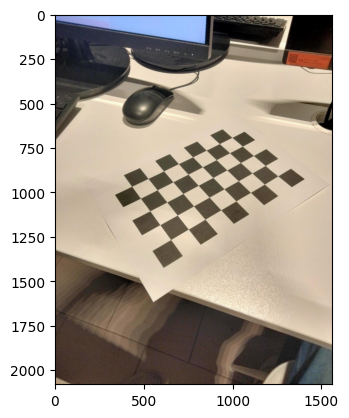

[[-4.11684744e-01  4.85043182e-01  7.20802623e+01]
 [-2.88891853e-01 -4.88369062e-01  8.08142734e+02]
 [ 2.13863336e-05  9.83992795e-04  1.00000000e+00]]
[124.39439079 236.03320791   1.        ]
[ 14.81997522 295.11204292   1.        ]


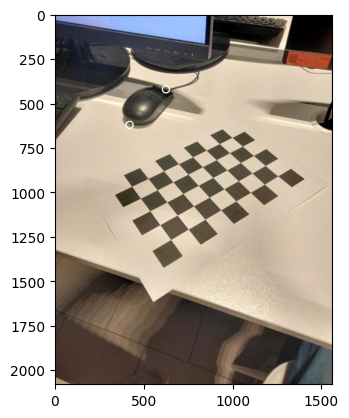

Lunghezza: 124.4863899931071 mm


In [31]:
# Write here your solution
import numpy as np
import cv2
from matplotlib import pyplot as plt

image_path = "my_chessboards/11.jpeg"

plt.figure()
img=cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


img_points_11 = img_points[11]
obj_points_11 = obj_points[11]
homography, _ = cv2.findHomography(img_points_11, obj_points_11[:,:2]) # passo da 2d a 3d
print(homography)

# mouse
# Coordinate clicked pixel (row,column): [419,623]
# Coordinate clicked pixel (row,column): [622,423]
start_2d = np.array([419, 623, 1])
end_2d = np.array([622, 423, 1])

# quadrato di calibrazione
# Coordinate clicked pixel (row,column): [660,947]
# Coordinate clicked pixel (row,column): [738,903]
# start_2d = np.array([660, 947, 1])
# end_2d = np.array([738, 903, 1])
 
start_3d = np.matmul(homography, start_2d)
start_3d = start_3d / start_3d[2]
print(start_3d)
end_3d = np.matmul(homography, end_2d)
end_3d = end_3d / end_3d[2]
print(end_3d)

# Verifichiamo di star facendo bene
start_2d_projective = np.matmul(np.linalg.inv(homography), start_3d)
start_2d = start_2d_projective / start_2d_projective[2] # back to euclidean space
start_2d = start_2d[:2]
end_2d_projective = np.matmul(np.linalg.inv(homography), end_3d)
end_2d = end_2d_projective / end_2d_projective[2] # back to euclidean space
end_2d = end_2d[:2]

cv2.circle(img, (int(start_2d[0]), int(start_2d[1])), 20 ,[255, 255, 255], 5)
cv2.circle(img, (int(end_2d[0]), int(end_2d[1])), 20 ,[255, 255, 255], 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

lunghezza = np.linalg.norm(end_3d - start_3d)
print(f"Lunghezza: {lunghezza} mm")

## Exercise 3: Augmented Reality 

Given an image, project it on the chessboard to cover all the corners of the image. Try to get restore the values of the original image (the one with the chessboard) instead of black pixels obtained with warping.

Get the 2D image coordinates using the Image Visualization Tool in LabSession3Exercise3VisualizationTool.ipynb or with cv2.findChessboardCorners.

Test the algorithm on "es3/stregatto.jpg" and "es3/stregatto2.jpg".

Expected result:
<img src="LabSession4Images/stregatto_appear.png" width=256>

**Tips (Only if needed)**
* Find the 4 points in the image where you would like to project the image with the chessboard
* Find the Perspective Transformation
* Warp the image
* Understand what are the points to restore with the original values
* Restore the values in those pixels

[[ 3.19134880e-02 -2.80083418e+00  2.53700000e+03]
 [ 2.47211213e+00 -2.36340871e-01  5.19000000e+02]
 [ 7.33955365e-07 -1.33579201e-04  1.00000000e+00]]
(4032, 3024, 3)


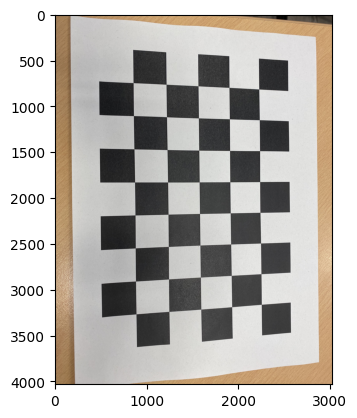

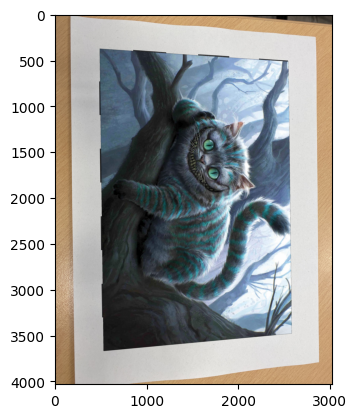

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

image = cv2.imread("./es3/chessboard.jpg")
image2project = cv2.imread("./es3/stregatto2.jpg") 

h, w = image.shape[0], image.shape[1]
h_2, w_2=  image2project.shape[0], image2project.shape[1]

# Coordinate of the chessboard in 0.jpg
rect = np.array([
    [2537, 519],
    [2573, 3480],
    [530, 3670],
    [488, 380]
], dtype = "float32")

# Coordinate of the border of the image we want to project
dst = np.array([
    [0, 0],
    [w_2 - 1, 0],
    [w_2 - 1, h_2 - 1],
    [0, h_2 - 1]
], dtype = "float32")

# Compute the perspective transform matrix 
# La perspective transform matrix è un omografia (infatti abbiamo bisogno di 4 punti)
# e la funzione di warping è l'applicazione di questa omografia
M = cv2.getPerspectiveTransform(dst, rect)
print(M)
# uguale identico a questo
# homography, _ = cv2.findHomography(dst, rect)
# print(homography)

# Apply the transformation matrix 
warped = cv2.warpPerspective(image2project, M, (w, h))

# Warp a white mask to understand what are the black pixels
white = np.ones([h_2, w_2, 3],dtype=np.uint8)*255
warp_mask = cv2.warpPerspective(white, M, (w, h))
# np.equal() returns arg1 == arg2 elementwise
# quindi qua stiamo recuperando una maschera per 
# tutti i pixel esterni allo stregatto
warp_mask = np.equal(warp_mask, np.array([0,0,0])) 
print(warp_mask.shape)

# Restore previous values
warped[warp_mask] = image[warp_mask]

# Display original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Display warped image
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()



## Exercise 4: Removal of perspective deformation 

Given a chessboard image remove the perspective deformation on the paper containing the chessboard and save it in a new image.

Get the 2D image coordinates using the Image Visualization Tool in LabSession3Exercise3VisualizationTool.ipynb

Test the exercise on "es4/pen.jpg"

Expected Results: 
<img src="LabSession4Images/perspective_deform.png" width=256>

**Tips (Only if needed)**
* Find the 4 points in the image of the corner of the paper 
* Understand what will be the dimension of the resulting image
* Find the Perspective Transformation
* Warp the paper into a new image (with the new dimensions you found)

[[ 124.  160.]
 [2448.  472.]
 [2404. 3572.]
 [  93. 3823.]]


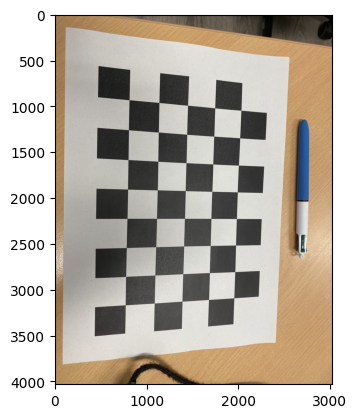

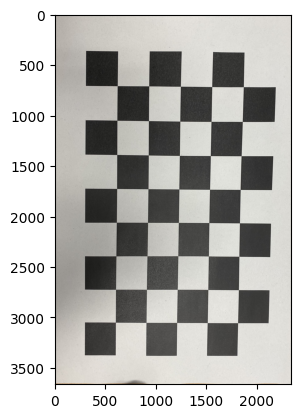

In [1]:
# Distorsion ignored in this exercise. Try to add the undistorsion in your solution.

import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("./es4/pen.jpg")

# Getting the 2D coordinate of the points of the corner of the paper
points = np.array([[93,3823], [124,160], [2448,472], [2404, 3572]])

# initialzie a list of 2d coordinates that will be ordered such that the first entry in the list is the top-left,
# the second entry is the top-right, the third is the bottom-right, and the fourth is the bottom-left
rect = np.zeros((4, 2), dtype = "float32")
# the top-left point will have the smallest sum, whereas the bottom-right point will have the largest sum
s = points.sum(axis = 1)
rect[0] = points[np.argmin(s)]
rect[2] = points[np.argmax(s)]
# now, compute the difference between the points, the top-right point will have the smallest difference, whereas the bottom-left will have the largest difference
diff = np.diff(points, axis = 1)
rect[1] = points[np.argmin(diff)]
rect[3] = points[np.argmax(diff)]

# we have the ordered coordinates obtain a consistent order of the points and unpack them individually
(tl, tr, br, bl) = rect
print(rect)

# compute the width of the new image, which will be the maximum distance between bottom-right and bottom-left x-coordiates or the top-right and top-left x-coordinates
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the maximum distance between the top-right and bottom-right y-coordinates or the top-left and bottom-left y-coordinates
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
# now that we have the dimensions of the new image, construct the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points in the top-left, top-right, bottom-right, and bottom-left order
dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]
], dtype = "float32")

# compute the perspective transform matrix and then apply it
M = cv2.getPerspectiveTransform(rect, dst)
warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()